In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
sns.set(font="AppleGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')

# 동작구 의류수거함

In [13]:
df = pd.read_csv("data/서울특별시 동작구_의류수거함 위치 데이터_20240911.csv") 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419 entries, 0 to 418
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   연번       419 non-null    int64  
 1   행정동      419 non-null    object 
 2   주소       419 non-null    object 
 3   위도       419 non-null    float64
 4   경도       419 non-null    float64
 5   데이터기준일자  419 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 19.8+ KB


In [14]:
df.shape

(419, 6)

In [26]:
df

,연번,행정동,주소,위도,경도,데이터기준일자
0,1,신대방1동,서울특별시 동작구 신대방길 59,37.488544,126.909484,2024-12-12
1,2,신대방1동,서울특별시 동작구 신대방길 80,37.489376,126.909826,2024-12-12
2,3,신대방1동,서울특별시 동작구 신대방1길 24,37.486759,126.910320,2024-12-12
3,4,신대방1동,서울특별시 동작구 신대방1길 38,37.486544,126.909617,2024-12-12
4,5,신대방1동,서울특별시 동작구 신대방1길 56,37.486278,126.908745,2024-12-12
...,...,...,...,...,...,...
414,415,사당5동,서울특별시 동작구 사당로 170,37.486633,126.967719,2024-12-12
415,416,사당5동,서울특별시 동작구 사당로 158,37.487380,126.966767,2024-12-12
416,417,사당5동,서울특별시 동작구 사당동 712-1,0.000000,0.000000,2024-12-12
417,418,사당5동,서울특별시 동작구 사당로16가길 71,37.484263,126.969693,2024-12-12


In [41]:
df = df[df["위도"] != 0].copy() # 위도가 0인 행들을 일단 삭제
df

,연번,행정동,주소,위도,경도,데이터기준일자
0,1,신대방1동,서울특별시 동작구 신대방길 59,37.488544,126.909484,2024-12-12
1,2,신대방1동,서울특별시 동작구 신대방길 80,37.489376,126.909826,2024-12-12
2,3,신대방1동,서울특별시 동작구 신대방1길 24,37.486759,126.910320,2024-12-12
3,4,신대방1동,서울특별시 동작구 신대방1길 38,37.486544,126.909617,2024-12-12
4,5,신대방1동,서울특별시 동작구 신대방1길 56,37.486278,126.908745,2024-12-12
...,...,...,...,...,...,...
413,414,사당5동,서울특별시 동작구 사당로2아길 2,37.490197,126.964541,2024-12-12
414,415,사당5동,서울특별시 동작구 사당로 170,37.486633,126.967719,2024-12-12
415,416,사당5동,서울특별시 동작구 사당로 158,37.487380,126.966767,2024-12-12
417,418,사당5동,서울특별시 동작구 사당로16가길 71,37.484263,126.969693,2024-12-12


## 동작구 의류 수거함 산점도

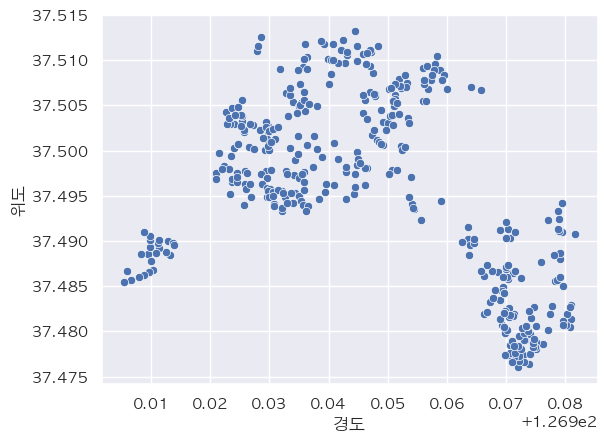

In [105]:
sns.scatterplot(data = df, x = "경도", y = "위도")
plt.show()

## 지도 표시


In [106]:
import folium

In [107]:
lat = df["위도"].mean()
long = df["경도"].mean()
lat

37.495589384157256

In [108]:
df.index

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       406, 409, 410, 411, 412, 413, 414, 415, 417, 418],
      dtype='int64', length=393)

In [109]:
m = folium.Map(location=[lat,long],
              zoom_start= 14,
            #tiles='cartodbpositron'
              )
for n in df.index:
    folium.Marker([df.loc[n,"위도"],df.loc[n,"경도"]],
                popup = df.loc[n,"주소"],
                tooltip= df.loc[n,"주소"]
                 ).add_to(m)
m

## 클러스터로 표현

In [110]:
import requests
import json

# 서울 행정구역 json raw파일(githubcontent) 행정구역 표기(바운더리 알아서 침) 서울에는 공개된 파일이 있음
r = requests.get('https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json')
c = r.content
seoul_geo = json.loads(c)
seoul_geo

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'code': '11250',
    'name': '강동구',
    'name_eng': 'Gangdong-gu',
    'base_year': '2013'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[127.11519584981606, 37.557533180704915],
      [127.11879551821994, 37.557222485451305],
      [127.12146867175024, 37.55986003393365],
      [127.12435254630417, 37.56144246249796],
      [127.13593925898998, 37.56564793048277],
      [127.14930548011061, 37.56892250303897],
      [127.15511020940411, 37.57093642128295],
      [127.16683184366129, 37.57672487388627],
      [127.17038810813094, 37.576465605301046],
      [127.17607118428914, 37.57678573961056],
      [127.17905504160184, 37.57791388161732],
      [127.17747787800164, 37.57448983055031],
      [127.1781775408844, 37.571481967974336],
      [127.17995281860672, 37.569309661290504],
      [127.18122821955262, 37.56636089217979],
      [127.18169407550688, 37.56286338914073],
      [127.18408792

In [111]:
m = folium.Map([lat,long], # 이렇게 map을 초기화를 해주지 않으면 기존 커서들이 다 살아있어서 초기화해줌
              zoom_start= 14
              )
folium.GeoJson(
        seoul_geo
).add_to(m)

from folium.plugins import MarkerCluster # folium.plugins에서 MarkerCluster를
markercluster = MarkerCluster().add_to(m)

for n in df.index:
    folium.Marker([df.loc[n,"위도"],df.loc[n,"경도"]],
                popup = df.loc[n,"주소"],
                tooltip= df.loc[n,"주소"],
                  color = "green"
                 ).add_to(markercluster) # 마커를 클러스터에 추가해주고 그러면 클러스터에서 마커에 반영해줌\
m.save("dongjakCloth.html") # html 파일로 저장
m